# Proyecto: Análisis de mercado inmobiliario

## Presentado por David Serna Gutiérrez / Ingeniero Forestal de Universidad Nacional de Col

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

**Respuesta 1)**

Dentro del dataset 'DS_Proyecto_01_Datos_Properati.csv' provisto por Acámica, encontramos 146.660 observaciones y 19 atributos por cada observación.

De las 19 columnas del dataset, teniendo en cuenta el objetivo del modelo, considero que las siguientes variables pueden ser útiles para determinar el precio de venta de las viviendas:

* **'l2'**: Hace referencia a las provincias, puede ser una variable de mucho peso, pues a grandes rasgos ubica las propiedades en 4 sectores.

* **'l3'**: Es una variable categórica, que clasifica las viviendas según la ciudad donde se vendieron. Puede separar a grandes rasgos ciudades con precios más altos que otros.

* **'rooms', 'bedrooms', 'bathrooms'**: Estas variables indican la cantidad de habitaciones, dormitorios y baños respectivamente. Es de esperarse una relación positiva con el precio, pues a mayor cantidad de cuartos es muy probable que el valor de la propiedad aumente.

* **'surface_total', 'surface_covered'**: Son el área total y el área de superficie respectivamente. Ambas variables pueden ser un insumo importante para la elaboración del modelo, no obstante, es prudente escoger una sola, pues hacen referencia prácticamente a lo mismo. En el proceso de depuración del modelo se pueden ingresar ambas y buscar cuál tiene mejor sensibilidad en relación con el cálculo del precio.

* **'price'**: Por supuesto es vital incluir el precio, pues será nuestra variable dependiente o de respuesta, siendo todas las demás independientes o explicativas.

* **'property_type'**: Al igual que las localidades, es una variable categórica que clasifica las viviendas en casas, departamentos, oficinas, entre otros. Esperaría que tuviera algún peso sobre el modelo, pues junto con la localidad y el barrio, brindan un acercamiento a lo que será la propiedad.

***Notación tardía del 29 de septiembre:*** Ahora soy consciente que en éste primer modelo está descartada la posibilidad de usar variables categóricas. Sin embargo lo dejo enunciado, pues me parece interesante y pertinente haberlo pensado como algo realizable.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

properati_raw = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
#Número de filas y columnas (forma del dataframe):
print(f"La base de datos tiene {properati_raw.shape[0]} observaciones y {properati_raw.shape[1]} atributos\n")

#Impresión de las 5 primeras instancias
properati_raw.head(5)

La base de datos tiene 146660 observaciones y 19 atributos



start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

#### **Imprimir únicamente los valores faltantes**

In [3]:
#Nombres de las columnas:
names_cols = properati_raw.columns

#Impresión de los nombres de las columnas
print("Los nombres de las columnas son: " + ', '.join(map(str,names_cols)))
print("\n")

#Imprimir nombres de las columnas y verificar cuáles tienen valores faltantes y cuántos.
for i in names_cols: #* Ver nota a continuación sobre los for utilizados
    if pd.isnull(properati_raw[i]).any() == True:
        print(f"La columna {[i]} tiene {pd.isnull(properati_raw[i]).sum()} valores faltantes")

Los nombres de las columnas son: start_date, end_date, created_on, lat, lon, l1, l2, l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, title, description, property_type, operation_type


La columna ['lat'] tiene 9925 valores faltantes
La columna ['lon'] tiene 9959 valores faltantes
La columna ['bathrooms'] tiene 5957 valores faltantes
La columna ['surface_total'] tiene 20527 valores faltantes
La columna ['surface_covered'] tiene 21614 valores faltantes


#### **Quitar valores faltantes**

Retiraré cualquier fila que tenga un valor faltante:

In [4]:
properati_sin_NA = properati_raw.dropna(axis = 0)

properati_raw_shape = properati_raw.shape
properati_sin_NA_shape = properati_sin_NA.shape

print(f'Se borraron en total {properati_raw_shape[0]-properati_sin_NA_shape[0]} filas del dataset y quedaron {properati_sin_NA_shape[0]} de las {properati_raw_shape[0]} iniciales')

Se borraron en total 32172 filas del dataset y quedaron 114488 de las 146660 iniciales


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

En el dataset existen 10 tipos de propiedad y cada una tiene la siguiente distribución: 
 
 Departamento       85071
Casa               15162
PH                 13530
Oficina              336
Casa de campo        240
Otro                  98
Lote                  29
Local comercial       15
Depósito               5
Cochera                2
Name: property_type, dtype: int64


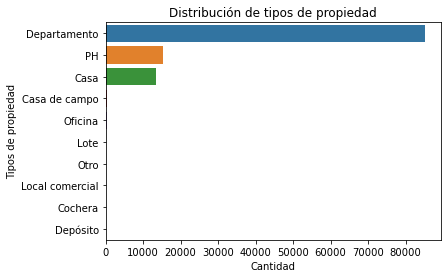

Como podemos observar, el tipo de propiedad más representativo son los departamentos, ocupando más de la mitad del data set.
Mientras casas y PH son casi la cuarta parte, y el resto de categorías representan una minoría


In [5]:
#Tipos de propiedad y cantidad
tipo_propiedad = properati_sin_NA['property_type']
summary_tipo_propiedad = properati_sin_NA.property_type.value_counts()

print(f"En el dataset existen {len(tipo_propiedad.unique())} tipos de propiedad y cada una tiene la siguiente distribución: \n \n {summary_tipo_propiedad}")

#Graficación de las instancias
#Separación del dataset entre 

grafica_tipo_propiedad = sns.countplot(data = properati_sin_NA, y = "property_type", order = properati_sin_NA['property_type'].value_counts().index)
grafica_tipo_propiedad.set_yticklabels(labels = tipo_propiedad.unique())
plt.title('Distribución de tipos de propiedad')
plt.ylabel('Tipos de propiedad')
plt.xlabel('Cantidad')
plt.show(grafica_tipo_propiedad)
print('Como podemos observar, el tipo de propiedad más representativo son los departamentos, ocupando más de la mitad del data set.\nMientras casas y PH son casi la cuarta parte, y el resto de categorías representan una minoría')

La siguiente operación se realiza con el fin de agrupar los tipos de vivienda, de manera que en la visualización se ahorren las categorias minoritarias, en este caso "Otros" abarca:

* Casa de Campo
* Oficina
* Lote
* Otro
* Local comercial
* Cochera
* Depósito

In [6]:
import warnings
warnings.filterwarnings('ignore')
#Segunda perspectiva utilizando los índices de las precensias o ausencias de una máscara booleana aplicada para escoger los tres tipos de viviendas más abudantes, y su NOT (~)
properati_group = properati_sin_NA.copy()

filtro = (properati_group['property_type'] == 'Departamento') | (properati_group['property_type'] == 'PH') | (properati_group['property_type'] == 'Casa')

i1 = properati_group.property_type[filtro].index
i2 = properati_group.property_type[~filtro].index

properati_group['new_type'] = None
properati_group.new_type[i1] = properati_group.property_type[i1]
properati_group.new_type[i2] = "Otros"

properati_group.new_type.value_counts()

Departamento    85071
Casa            15162
PH              13530
Otros             725
Name: new_type, dtype: int64

A continuación se realiza el mismo gráfico:

En el dataset existen 4 tipos de propiedad y cada una tiene la siguiente distribución: 
 
 Departamento    85071
Casa            15162
PH              13530
Otros             725
Name: new_type, dtype: int64


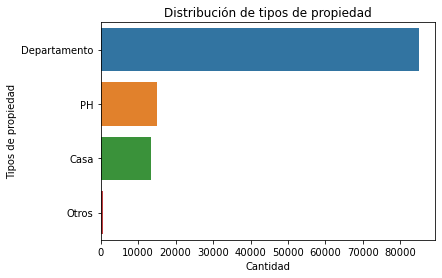

In [7]:
#Tipos de propiedad y cantidad
tipo_propiedad = properati_group['new_type']
summary_tipo_propiedad = properati_group.new_type.value_counts()

print(f"En el dataset existen {len(tipo_propiedad.unique())} tipos de propiedad y cada una tiene la siguiente distribución: \n \n {summary_tipo_propiedad}")

#Graficación de las instancias
#Separación del dataset entre 

grafica_tipo_propiedad = sns.countplot(data = properati_group, y = "new_type", order = properati_group['new_type'].value_counts().index)
grafica_tipo_propiedad.set_yticklabels(labels = tipo_propiedad.unique())
plt.title('Distribución de tipos de propiedad')
plt.ylabel('Tipos de propiedad')
plt.xlabel('Cantidad')
plt.show(grafica_tipo_propiedad)

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

En el dataset existen 4 provincias y cada una tiene las siguiente cantidad de publicaciones: 
 
 Capital Federal             77338
Bs.As. G.B.A. Zona Norte    18582
Bs.As. G.B.A. Zona Sur      10477
Bs.As. G.B.A. Zona Oeste     8091
Name: l2, dtype: int64




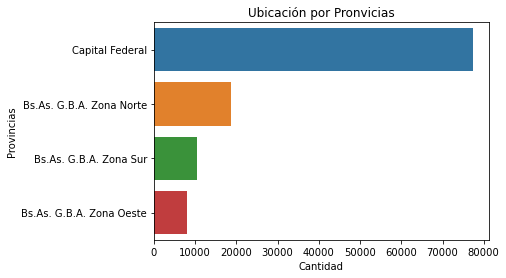

Se observa en la visualización que Capital Federal alberga la mitad de los datos, lo que representa un sesgo población hacia una región específica. Limitando el alcance de una extrpolación. Por lo que se podría generar un modelo independiente por provincia


In [8]:
#Graficación por provincias
summary_provincias = properati_sin_NA.l2.value_counts()
provincias = properati_sin_NA.l2.unique()

print(f"En el dataset existen {len(properati_sin_NA['l2'].unique())} provincias y cada una tiene las siguiente cantidad de publicaciones: \n \n {summary_provincias}")
print('\n')

por_provincias = sns.countplot(y =properati_sin_NA['l2'], order = properati_sin_NA['l2'].value_counts().index)
plt.title('Ubicación por Pronvicias')
plt.ylabel('Provincias')
plt.xlabel('Cantidad')

plt.show(por_provincias)

print('Se observa en la visualización que Capital Federal alberga la mitad de los datos, lo que representa un sesgo población hacia una región específica. Limitando el alcance de una extrpolación. Por lo que se podría generar un modelo independiente por provincia')


En el dataset existen 89 ciudades y cada una tiene las siguiente cantidad de publicaciones: 
 
 Palermo             11211
Almagro              6655
Tigre                6069
Villa Crespo         5835
Caballito            5562
                    ...  
Presidente Perón       67
Villa Soldati          65
Villa Riachuelo        33
Marcos Paz             21
Catalinas               5
Name: l3, Length: 89, dtype: int64




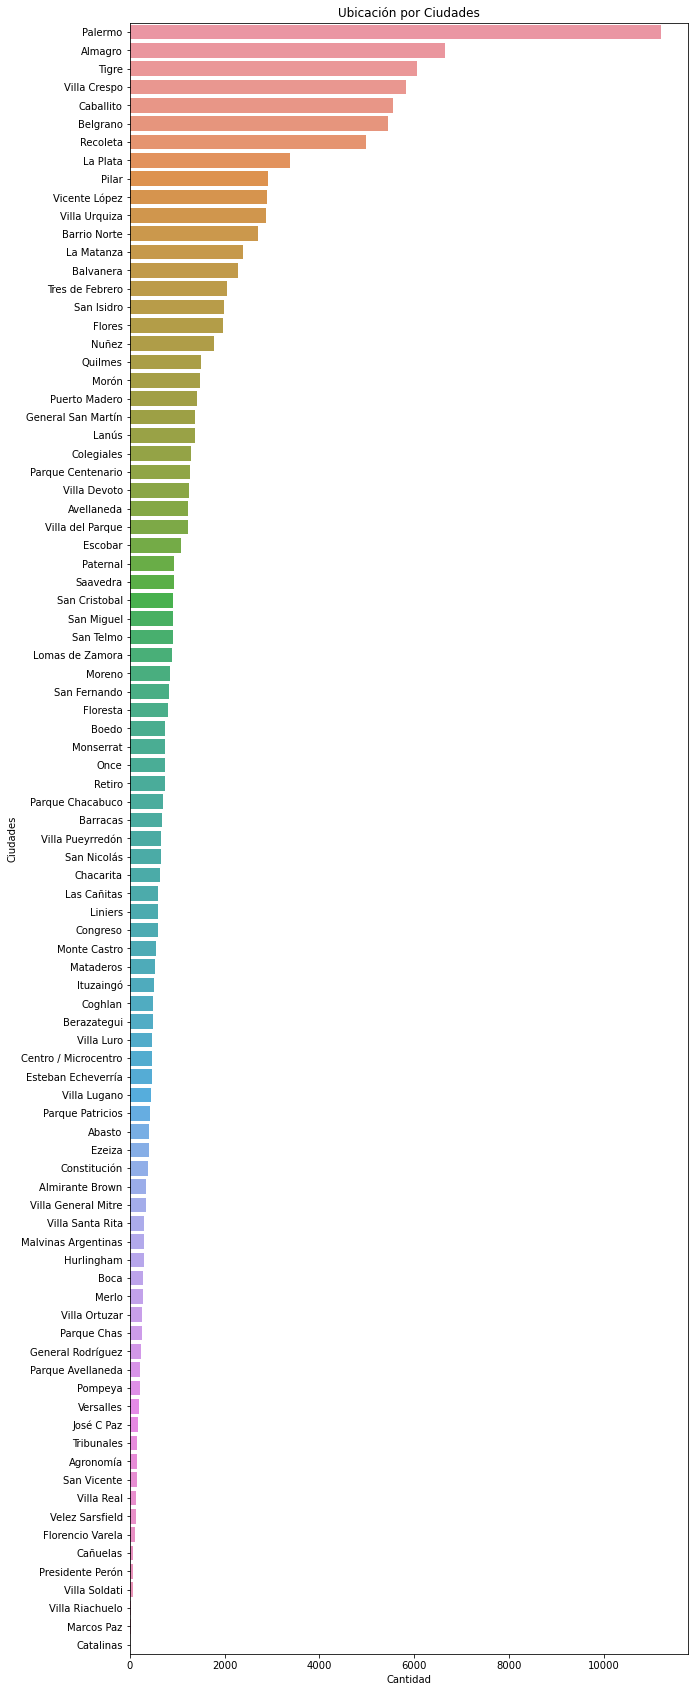

En la visualización no se observa nada que valga la pena restaltar


In [9]:
#Graficación por ciudades
summary_ciudades = properati_sin_NA.l3.value_counts()
ciudades = properati_sin_NA.l3.unique()

print(f"En el dataset existen {len(properati_sin_NA['l3'].unique())} ciudades y cada una tiene las siguiente cantidad de publicaciones: \n \n {summary_ciudades}")
print('\n')

figura = plt.figure(figsize=(10,30))
por_ciuadades = sns.countplot(y = properati_sin_NA['l3'], order = properati_sin_NA['l3'].value_counts().index)

plt.title('Ubicación por Ciudades')
plt.ylabel('Ciudades')
plt.xlabel('Cantidad')

plt.show(por_ciuadades)

print('En la visualización no se observa nada que valga la pena restaltar')

Acá lo realizaré con Subplot, pero no me pareció la mejor manera

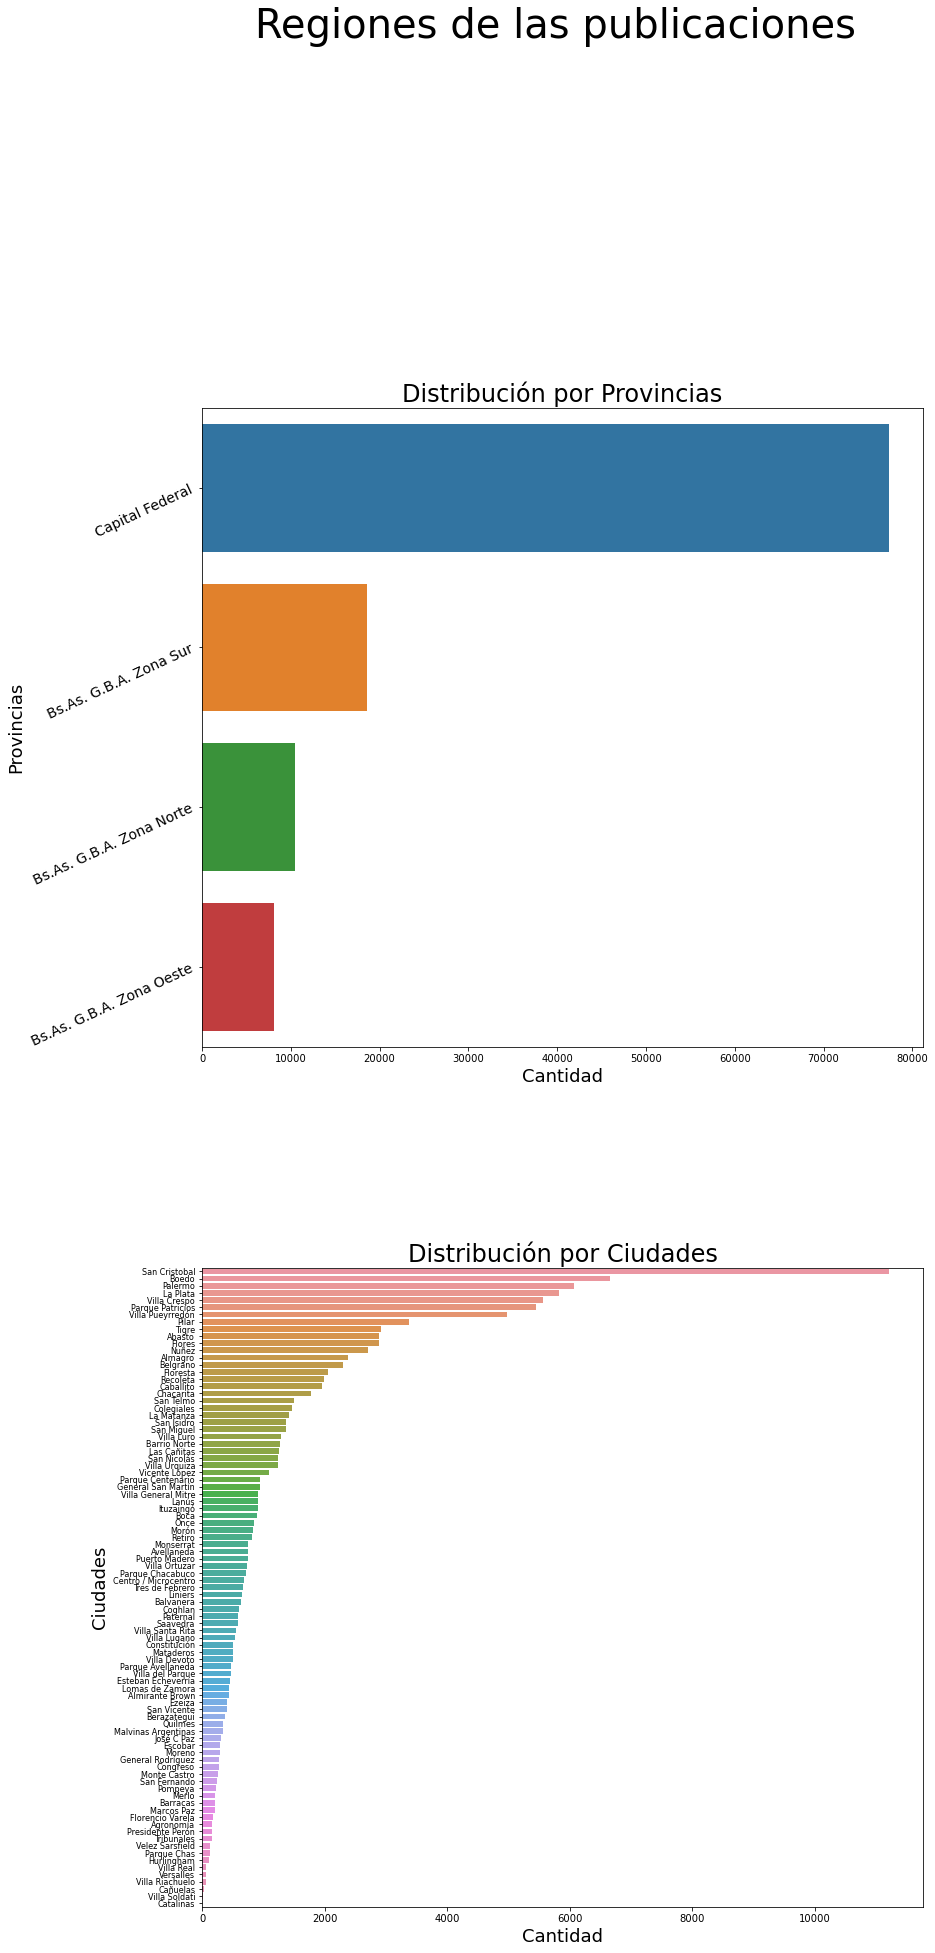

In [10]:
warnings.filterwarnings('ignore')
#Graficacion de l2 y l3 mediante subplot
#Creación de las figuras separadas
fig, ax =plt.subplots(2,1, figsize=(16, 30))
fig.suptitle('Regiones de las publicaciones', fontsize = 40)
fig.tight_layout(pad=20)

#Gráfico por provincias
sns.countplot(y =properati_sin_NA['l2'], order = properati_sin_NA['l2'].value_counts().index, ax=ax[0])
ax[0].set_yticklabels(rotation = 25, labels = provincias, fontsize = 14)
ax[0].set_title('Distribución por Provincias', fontsize = 24)
ax[0].set_ylabel('Provincias', fontsize = 18)
ax[0].set_xlabel('Cantidad', fontsize = 18)

#Gráfica por ciudades
sns.countplot(y = properati_sin_NA['l3'], order = properati_sin_NA['l3'].value_counts().index, ax=ax[1])
ax[1].set_yticklabels(rotation = 0, labels = ciudades, fontsize = 8)
ax[1].set_title('Distribución por Ciudades', fontsize = 24)
ax[1].set_ylabel('Ciudades', fontsize = 18)
ax[1].set_xlabel('Cantidad', fontsize = 18)

fig.show()


5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [11]:
properati_new_sin_NA = properati_sin_NA.loc[((properati_sin_NA['property_type'] == 'Departamento') | (properati_sin_NA['property_type'] == 'PH') | (properati_sin_NA['property_type'] == 'Casa')) & (properati_sin_NA['l2'] == 'Capital Federal')]

#91485 observaciones y 19 columnas
print(properati_new_sin_NA.shape)

properati_new = properati_raw.loc[((properati_raw['property_type'] == 'Departamento') | (properati_raw['property_type'] == 'PH') | (properati_raw['property_type'] == 'Casa')) & (properati_raw['l2'] == 'Capital Federal')]#con na's

print(properati_new.shape)

(76961, 19)
(91485, 19)


Al retirar los valores faltantes, la respuesta del checkpoint es diferente. Sin embargo se observa que al hacerlo con el dataset completo están las instanacias solicitadas
# **796961, 19**
# **91485, 19**

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    


1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido


In [12]:
#1) Resumen de los valores que toma cada atributo:
datos = ['rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']
for n in datos:
    print(n+"\n")
    print(properati_new.describe().loc[['min','max','std', 'mean'], n])
    print('\n')

rooms

min      1.000000
max     26.000000
std      1.314704
mean     2.964278
Name: rooms, dtype: float64


bedrooms

min      0.000000
max     15.000000
std      1.072946
mean     1.960278
Name: bedrooms, dtype: float64


bathrooms

min      1.000000
max     14.000000
std      0.860309
mean     1.560147
Name: bathrooms, dtype: float64


surface_total

min         10.000000
max     126062.000000
std        980.713664
mean       112.626369
Name: surface_total, dtype: float64


surface_covered

min          1.000000
max     126062.000000
std        778.515243
mean        94.966310
Name: surface_covered, dtype: float64


price

min     6.000000e+03
max     3.243423e+07
std     3.222654e+05
mean    2.595003e+05
Name: price, dtype: float64




Al parecer hay valores muy particulares sí se analiza detalladamente: 

* [rooms]: Hay propiedades con 26 cuartos, lo cual es un extremo muy grande del promedio de 3.

* [bedrooms]: Igual que en las habitaciones, 15 dormitorios es un valor extremo; levanta sospechas las propiedades sin dormitorios.

* [bathrooms]: Catorce baños al parecer puede ser un valor atípico.

* [surface_total] & [surface_covered]: Valores muy elevados, y como vemos hay un valor mínimo total de 10 m2 y cubierta de 1m2. ¿Qué clase de espacios son esos? 


2. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

3. Lo mismo ocurre con valores de superficie total muy chico.

(81989, 19)

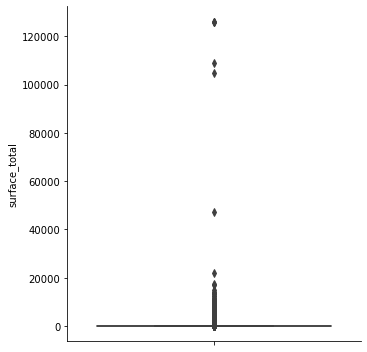

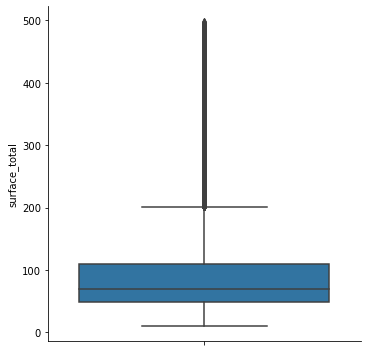

In [13]:
#2 y 3
#Primer grafico exploratorio
sns.catplot(data = properati_new, y = 'surface_total', kind = 'box')

##Es prudente no eliminar las áreas pequeñas, pues el mayor conglomerado de datos está en la región de áreas bajas, que hace referencia a casas modestas
# Es conveniente eliminar áreas muy grandes. Se decidió filtrar áreas totales menores a 500 m2
properati_surface = properati_new[properati_new['surface_total'] < 500]

#Segundo gráfico sin los outliers
sns.catplot(data = properati_surface, y = 'surface_total', kind = 'box')

#Téngase en cuenta que eliminamos 9496 observaciones
properati_surface.shape

Se eliminaron 17423 valores extremos. Y el área máxima y mínima son 249.0, 35.0 respectivamente.
Teniendo en total 74062 observaciones hasta ahora.


La desviacion estandar inicial de las superficies es 2037.5985717261613.

Al filtrar los valores inferiores al 5% y superiores al 95% de la media, tenemos una std = 45.559837034822046




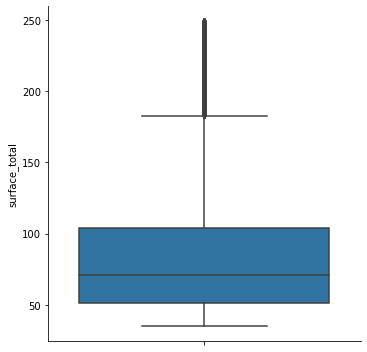

In [14]:
#Con la idea de optimizar estadísticamente la decisión sobre a partir de qué valores se puede hacer un recorte
#Preferí utilizar los percentíles, pues hay un criterio, y no una visualización
#Procedí a retirar las colas del 0.05 de los datos de superficie
properati_surface = properati_new.copy()
properati_surface = properati_surface[(properati_new.surface_total < properati_new.surface_total.quantile(0.95)) & (properati_new.surface_total > properati_new.surface_total.quantile(0.05))]

print(f"Se eliminaron {properati_new.shape[0] - properati_surface.shape[0]} valores extremos. Y el área máxima y mínima son {np.max(properati_surface.surface_total)}, {np.min(properati_surface.surface_total)} respectivamente.\nTeniendo en total {properati_surface.shape[0]} observaciones hasta ahora.\n\n")
sns.catplot(data = properati_surface, y = 'surface_total', kind = 'box')

print(f'La desviacion estandar inicial de las superficies es {np.std(properati_raw.surface_total)}.\n\n\
Al filtrar los valores inferiores al 5% y superiores al 95% de la media, tenemos una std = {np.std(properati_surface.surface_total)}\n\n')


4. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.

In [15]:
warnings.filterwarnings('ignore')
#4)Superficies cubiertas no deben ser mayores a las totales

#Creamos una copia del data set, le hacemos una máscara, para luego sacar los índices de esos valores

properati_surface_copy = properati_surface.copy()
mascara = properati_surface.surface_total[(properati_surface['surface_covered'] > properati_surface['surface_total'])]
indexes = mascara.index

#Corremos un for por los indices indicándole que en esos lugares se haga el remplazo
for i in indexes:
    properati_surface_copy.surface_covered[i] = properati_surface_copy.surface_total[i]

In [16]:
warnings.filterwarnings('ignore')
#Verificamos que se hayan hecho los cambios
error = 0
valido = 0
for i in properati_surface_copy.index:
    if properati_surface_copy.surface_covered[i] > properati_surface_copy.surface_total[i]:
        error += 1
    else:
        valido += 1
print(f"El total de válidos es {valido} e invalidos {error}")

El total de válidos es 74062 e invalidos 0


5. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.

Se eliminaron 7507 valores extremos de precios


La desviacion estandar inicial del precio es 222971.46199330137.

Al filtrar los valores inferiores al 5% y superiores al 95% de la media, tenemos una std = 100577.5361609273




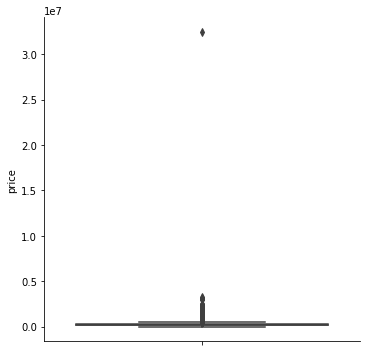

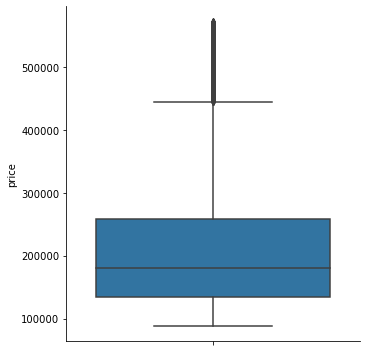

In [17]:
#Boxplot exploratorio para ver la distribución de la variable
sns.catplot(data = properati_surface_copy, y = 'price', kind = 'box')

#Realizaremos el mismo filtrado de la variable de precios
#Se decide eliminar el 2.5% de cada cola
properati_2 = properati_surface_copy.copy()
properati_2 = properati_2[(properati_2.price < properati_2.price.quantile(0.95)) & (properati_2.price > properati_2.price.quantile(0.05))]

sns.catplot(data = properati_2, y = 'price', kind = 'box')

print(f"Se eliminaron {properati_surface_copy.shape[0] - properati_2.shape[0]} valores extremos de precios\n\n")

print(f'La desviacion estandar inicial del precio es {np.std(properati_surface_copy.price)}.\n\n\
Al filtrar los valores inferiores al 5% y superiores al 95% de la media, tenemos una std = {np.std(properati_2.price)}\n\n')

In [18]:
#A continuación se retiraran los valores faltantes en este último data set, y se dejaran los seis atributos más importantes:
properati_2_sin_NA = properati_2.dropna(axis = 0)
print(properati_2.shape)
print(properati_2_sin_NA.shape)

properati_small_sinNA = properati_2_sin_NA[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
properati_small_sinNA.shape

properati_small = properati_2[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
properati_small.shape

(66555, 19)
(62406, 19)


(66555, 6)

6. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

El Pairplot se realiza con las variables que se usaran para la elaboración de los modelos. Dado que las variables categóricas no se pueden incluir, y las coordenadas en este tipo de análisis no ayudan en mucho.

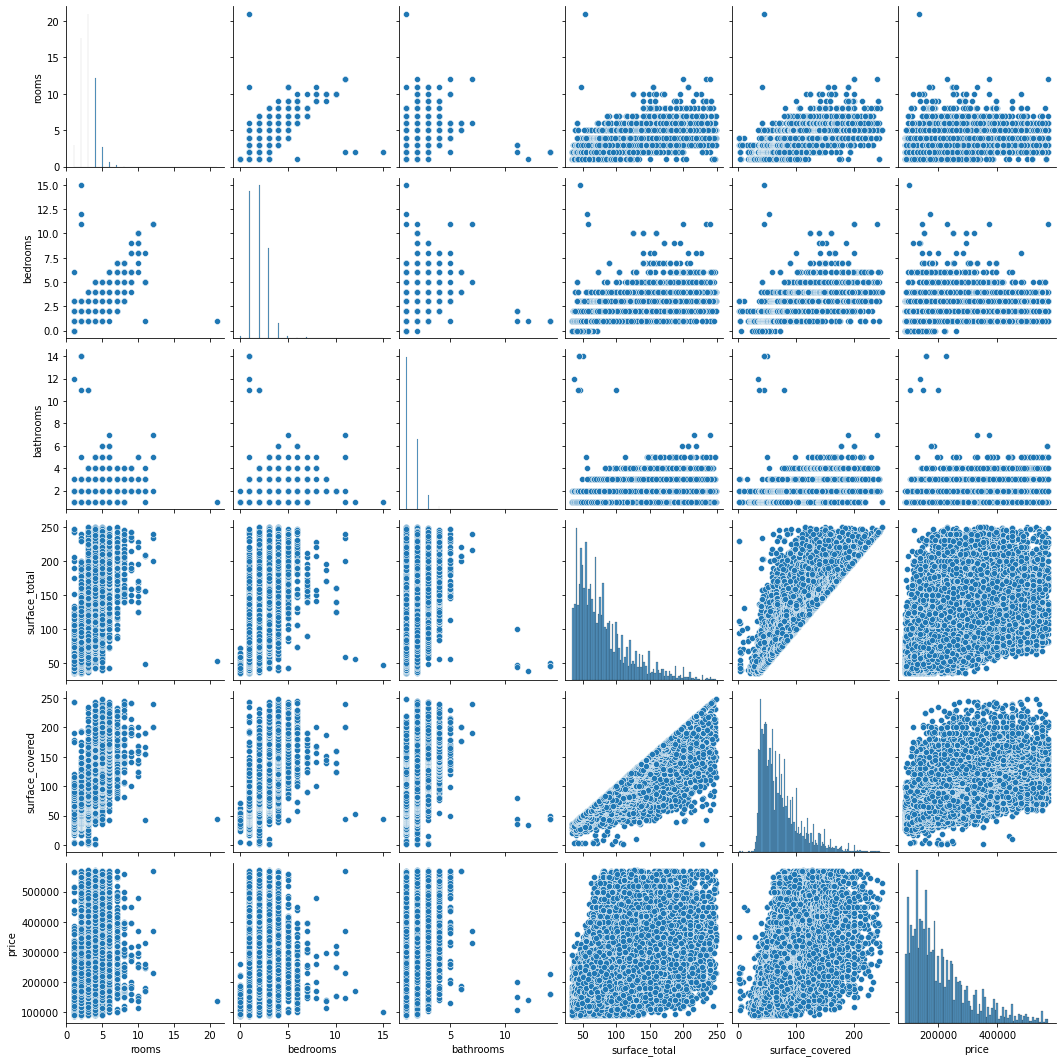

In [19]:
sns.pairplot(properati_small)
plt.show()

En este pairplot se observa en la diagonala la distribución de cada variable.

La que mejor correlaciona con el precio es la superficie total y superficie cubierta

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

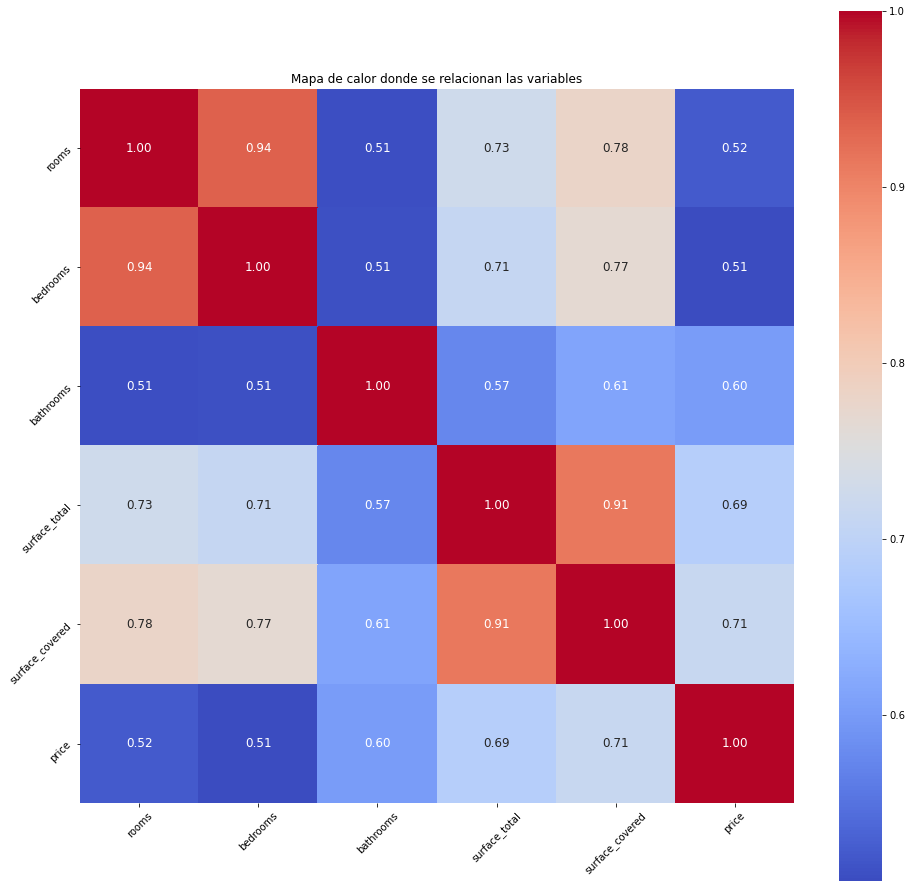

In [20]:
matriz_correlacion = properati_small.corr()
matriz_correlacion 

plt.figure(figsize=(16,16))
sns.heatmap(matriz_correlacion, cbar = True,  square = True, annot = True, fmt = '.2f', annot_kws = {'size': 12}, cmap = 'coolwarm')
plt.title('Mapa de calor donde se relacionan las variables')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Como se predijo con anterioridad el precio tiene una relación positiva con la superficie cubierta y total.
Vale la pena recordar el data set que veniamos trabajando. Se redujo en más de la mitad!

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

La pregunta será la siguiente: ¿Cuál es la provincia que tiene el mayor precio por m2?:

In [21]:
warnings.filterwarnings('ignore')
#Partimos del siguiente data set
#Primero del original corregimos lo de surface_covered <= surface_total
properati_challenge = properati_raw.copy()
mascara = properati_challenge.surface_total[(properati_challenge['surface_covered'] > properati_challenge['surface_total'])]
indexes = mascara.index

#Corremos un for por los indices indicándole que en esos lugares se haga el remplazo
for i in indexes:
    properati_challenge.surface_covered[i] = properati_challenge.surface_total[i]
    
#Y sacamos los valores faltantes:
properati_challenge_sinNA = properati_challenge.dropna(axis=0)
print(properati_challenge_sinNA.shape)
print(properati_challenge.shape)

(114488, 19)
(146660, 19)


In [22]:
warnings.filterwarnings('ignore')
#Con esa base de datos debemos calcular el valor por m2. Se hará con el área total.
properati_challenge_sinNA['price_m2'] = properati_challenge_sinNA.price/properati_challenge_sinNA.surface_total

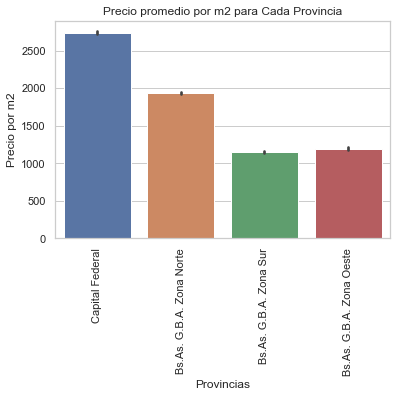

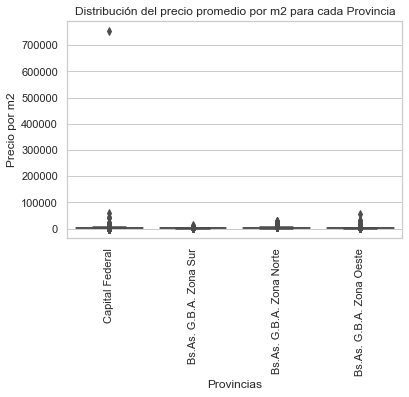

In [23]:
#Ahora haremos un gráfico para entender el comportamiento:
sns.set_theme(style="whitegrid")
graph= sns.barplot(x="l2", y="price_m2", data=properati_challenge_sinNA, order = properati_challenge_sinNA.groupby('l2').price_m2.size().sort_values(ascending= False).index)
plt.title('Precio promedio por m2 para Cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph)
graph2= sns.boxplot(x="l2", y="price_m2", data=properati_challenge_sinNA)
plt.title('Distribución del precio promedio por m2 para cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph2)

Se observa que en Capital Federal se encuentran las propiedades más costosas, sin embargo, hay un outlier muy fuerte. A continuación se hará la misma gráfica partiendo del data set "properati_challenge_sinNA" pasando por los filtros de las colas del 5% entre precio y superficie total

In [24]:
properati_challenge_filtered = properati_challenge_sinNA.copy()
properati_challenge_filtered = properati_challenge_filtered[(properati_challenge_filtered.surface_total < properati_challenge_filtered.surface_total.quantile(0.95)) & (properati_challenge_filtered.surface_total > properati_challenge_filtered.surface_total.quantile(0.05))]
properati_challenge_filtered = properati_challenge_filtered[(properati_challenge_filtered.price < properati_challenge_filtered.price.quantile(0.95)) & (properati_challenge_filtered.price > properati_challenge_filtered.price.quantile(0.05))]
properati_challenge_filtered.head()
properati_challenge_filtered.shape
#Debemos recalcular el precio por m2!!!
properati_challenge_filtered['price_m2'] = properati_challenge_filtered.price/properati_challenge_filtered.surface_total

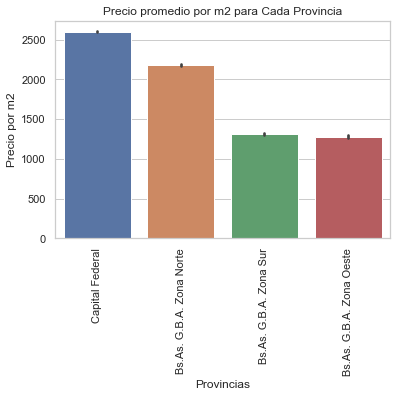

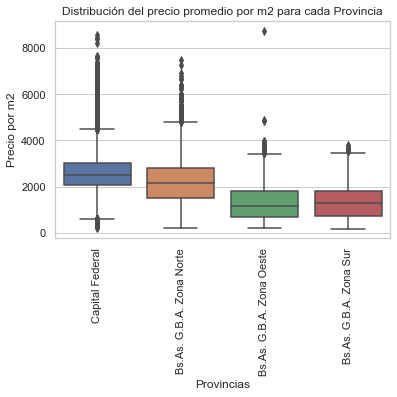

In [25]:
sns.set_theme(style="whitegrid")
graph= sns.barplot(x="l2", y="price_m2", data=properati_challenge_filtered, order = properati_challenge_filtered.groupby('l2').price_m2.size().sort_values(ascending= False).index)
plt.title('Precio promedio por m2 para Cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph)
graph2= sns.boxplot(x="l2", y="price_m2", data=properati_challenge_filtered)
plt.title('Distribución del precio promedio por m2 para cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph2)

El gráfico de barras no cambia mucho, pero obsérvese la distribución como cambia. Ya no están los outliers tan pronunciados.

¿Y qué tal sí filtramos esas colas como sí cada provincia fuera una distribución diferente de datos? es decir, vamos a tirar código:

In [26]:
provincias = properati_challenge_sinNA.l2.unique()
obj0 = pd.DataFrame()
for provincia in provincias:
    #Separamos por provincia
    obj1 = properati_challenge_sinNA[properati_challenge_sinNA.l2 == str(provincia)]
    #Le retiramos las colas del 5% a la superficie
    obj2 = obj1[(obj1.surface_total < obj1.surface_total.quantile(0.95)) & (obj1.surface_total > obj1.surface_total.quantile(0.5))]
    #Le retiramos las colas del 5% al precio
    obj2 = obj2[(obj2.price < obj2.price.quantile(0.95)) & (obj2.price > obj2.price.quantile(0.5))]
    obj0 = obj0.append(obj2)
properati_colas_provincias = obj0.copy()
properati_colas_provincias.shape
properati_colas_provincias['price_m2'] = properati_colas_provincias.price/properati_colas_provincias.surface_total

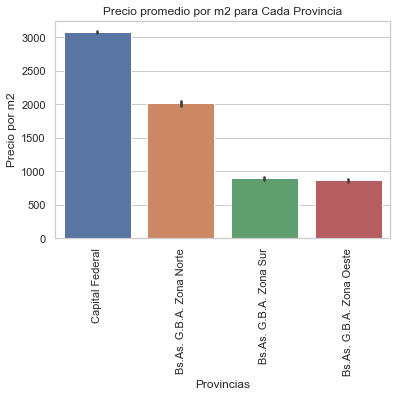

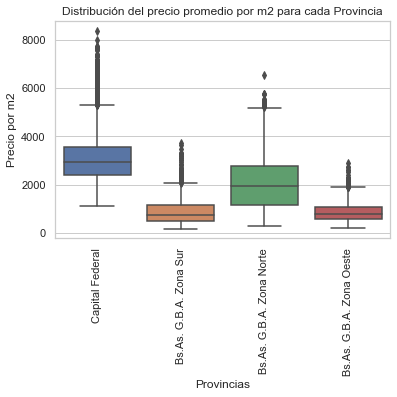

In [27]:
sns.set_theme(style="whitegrid")
graph= sns.barplot(x="l2", y="price_m2", data=properati_colas_provincias, order = properati_colas_provincias.groupby('l2').price_m2.size().sort_values(ascending= False).index)
plt.title('Precio promedio por m2 para Cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph)
graph2= sns.boxplot(x="l2", y="price_m2", data=properati_colas_provincias)
plt.title('Distribución del precio promedio por m2 para cada Provincia')
plt.ylabel('Precio por m2')
plt.xlabel('Provincias')
plt.xticks(rotation = 90)
plt.show(graph2)

Es evidente en este caso no hay outliers inferiores para Capital Federal y que el precio por metro cuadrado sigue siendo el más caro en Capital Federal.

In [28]:
print(f"El precio maximo al inicio del data set era:{properati_challenge_sinNA.groupby('l2').price_m2.max()}")
print(f"Luego de hacer el filtrado a todo el tada set del 5% de cada cola{properati_challenge_filtered.groupby('l2').price_m2.max()}")
print(f"Al aplicar el 5% a cada provincia {properati_colas_provincias.groupby('l2').price_m2.max()}")

El precio maximo al inicio del data set era:l2
Bs.As. G.B.A. Zona Norte     29066.666667
Bs.As. G.B.A. Zona Oeste     54466.230392
Bs.As. G.B.A. Zona Sur       14444.444444
Capital Federal             754284.465116
Name: price_m2, dtype: float64
Luego de hacer el filtrado a todo el tada set del 5% de cada colal2
Bs.As. G.B.A. Zona Norte    7483.333333
Bs.As. G.B.A. Zona Oeste    8750.000000
Bs.As. G.B.A. Zona Sur      3816.793893
Capital Federal             8582.089552
Name: price_m2, dtype: float64
Al aplicar el 5% a cada provincia l2
Bs.As. G.B.A. Zona Norte    6565.656566
Bs.As. G.B.A. Zona Oeste    2909.090909
Bs.As. G.B.A. Zona Sur      3730.158730
Capital Federal             8375.000000
Name: price_m2, dtype: float64


Al hacer este ejercicio queda en evidencia la manipulación posterior que se le puedan hacer a los datos, y quién interpreta. Algunos factores que alteran la variabilidad de los datos son por ejemplo, la precisión con que se mide la superficie o sí, efectivamente, los valores tan altos de propiedad son verídicos o a causa de errores de digitación.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [29]:
#A continuación realizaremos el filtrado solicitado:
#1)Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa:
ML_properati = properati_new.copy() #Ya se había llegado acá desde 'properaty_raw'
#2)Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
ML_properati = ML_properati[(ML_properati['surface_total'] <= 1000) & (ML_properati['surface_total'] >= 15)]
#3)Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
ML_properati = ML_properati[(ML_properati['price'] <= 4000000)]
#4)Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
ML_properati = ML_properati[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
#5)Descarta aquellas instacias con valores faltantes.
ML_properati = ML_properati.dropna()
ML_properati.shape

(81019, 6)

1) Elegir una métrica apropiada para evaluar los resultados de los modelos.

En este caso tenemos un problema de regresión. La métrica más indicadada en este caso es la raíz cuadrada de los errores medios cuadráticos o por sus siglas en inglés el RMSE. Tanto árboles como vecinos pueden ser evaluados en función de la raíz cuadrada de la sumatoria de la diferencia cuadrada de los valores observados y predichos, es decir la RMSE:

$$
RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}
$$

Con base en lo anterior se plantea una manera interesante de abordar el problema, dado que debemos evaluar el árbol y los vecinos con base en su profundidad y cantidad de vecinos, me apoyaré en los códigos de Acámica de manera que pueda extraer suficiente información para tomar una decisión:

2) Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 

In [30]:
X = ML_properati.drop('price',axis=1)
y = ML_properati.price

3) Realizar un Train/Test split de los datos.

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#Queda constituido los datos de entrenamiento y testeo:

#56713 obs para entrenar y 24306 para testear, y tenemos 5 variables que van a predecir X

(56713, 5) (56713,) (24306, 5) (24306,)


4) Generar un modelo *benchmark* y evaluarlo.

5) Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.

6) Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.

7) Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.

# MODELO LINEAL (BENCHMARK)

Raíz del error cuadrático medio en Train: 199173.83253528475
Raíz del error cuadrático medio en Test: 202449.36540361567


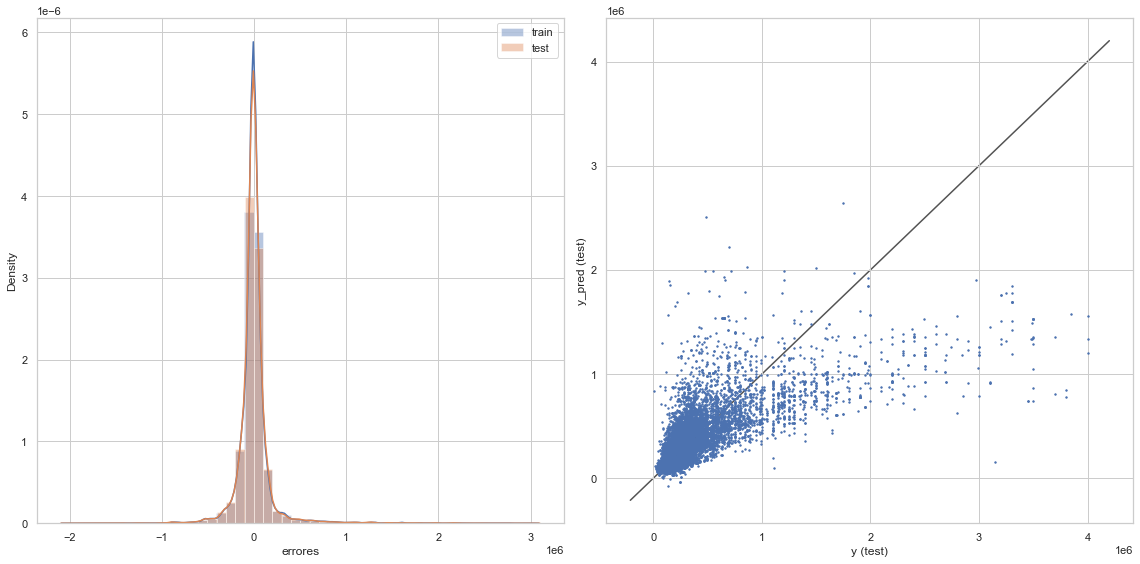

In [32]:
#El primer modelo será el lineal

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_train_pred_lin = linear_model.predict(X_train)
y_test_pred_lin = linear_model.predict(X_test)
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

#Dado que el modelo lineal está en función de cinco variables, su visualización no es posible. Pero podemos ver su comportamiento frente a los errores:

#Definiremos esta función acá para no repetir tanto código:
#Apoyados en el notebook de acámica sacamos este gráfico de los errores
def graficacion_errores(rmse_prueba,rmse_testeo,y_entre_pred,y_prue_pred):
    print(f'Raíz del error cuadrático medio en Train: {rmse_prueba}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_testeo}')
    
    plt.figure(figsize = (16,8))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_entre_pred, bins = 50, label = 'train')
    sns.distplot(y_test - y_prue_pred, bins = 50, label = 'test')
    plt.xlabel('errores')
    plt.legend()
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_prue_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
graficacion_errores(rmse_train_lin,rmse_test_lin,y_train_pred_lin,y_test_pred_lin)

# KNN

In [33]:
#Evaluaremos que número de vecinos es el óptimo:

from sklearn.neighbors import KNeighborsRegressor


#Vamos a hacer este ejercicio usando "vecinos" 
#como el argumento que modificara la la cantidad de vecinos.
#Encontraremos visualmente cuál es el número de vecinos que mejor reduce el RMSE
vecinos = list(np.arange(1,26))
lista_rmse_train = []
lista_rmse_test = []

for i in vecinos:
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    
    y_train_pred = KNN.predict(X_train)
    y_test_pred = KNN.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

In [ ]:
#Realizamos el test visual
plt.plot(vecinos, lista_rmse_train, 'o-', label='Train')
plt.plot(vecinos, lista_rmse_test, 'o-', label='Test')
plt.title('Comparación entre vecinos cercanos y RMSE')
plt.legend()
plt.xlabel('Número de vecinos cercanos')
plt.ylabel('RMSE')

In [35]:
#Miremos donde sucede el menor valor de RMSE:
min_train = lista_rmse_train == np.min(lista_rmse_train)
min_test = lista_rmse_test == np.min(lista_rmse_test)

#Obtenemos la posición en el vector, recuerden que la posición [0] es el primer valor, osea 1.
print(np.where(min_train))
print(np.where(min_test))

#Lo que tenemos es lo sigueinte
print(f"Para el entrenamiento el RMSE mas bajo es de :{np.min(lista_rmse_train)} con 1 vecino")
print(f"Para el testeo el RMSE mas bajo es de :{np.min(lista_rmse_test)} con 3 vecino")

#La RMSE más baja se presenta con 1 vecino

(array([0], dtype=int64),)
(array([2], dtype=int64),)
Para el entrenamiento el RMSE mas bajo es de :77925.75966409931 con 1 vecino
Para el testeo el RMSE mas bajo es de :152317.82229037234 con 3 vecino


In [36]:
#Volvemos a correr el modelo
#Esta vez con dos vecinos, resultado del promedio entre 1 y 3 del train vs test respectivamente
KNN_2 = KNeighborsRegressor(n_neighbors=2)
KNN_2.fit(X_train,y_train)
y_train_pred_2 = KNN_2.predict(X_train)
y_test_pred_2 = KNN_2.predict(X_test)
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

Raíz del error cuadrático medio en Train: 92435.07024633957
Raíz del error cuadrático medio en Test: 153607.76698581807


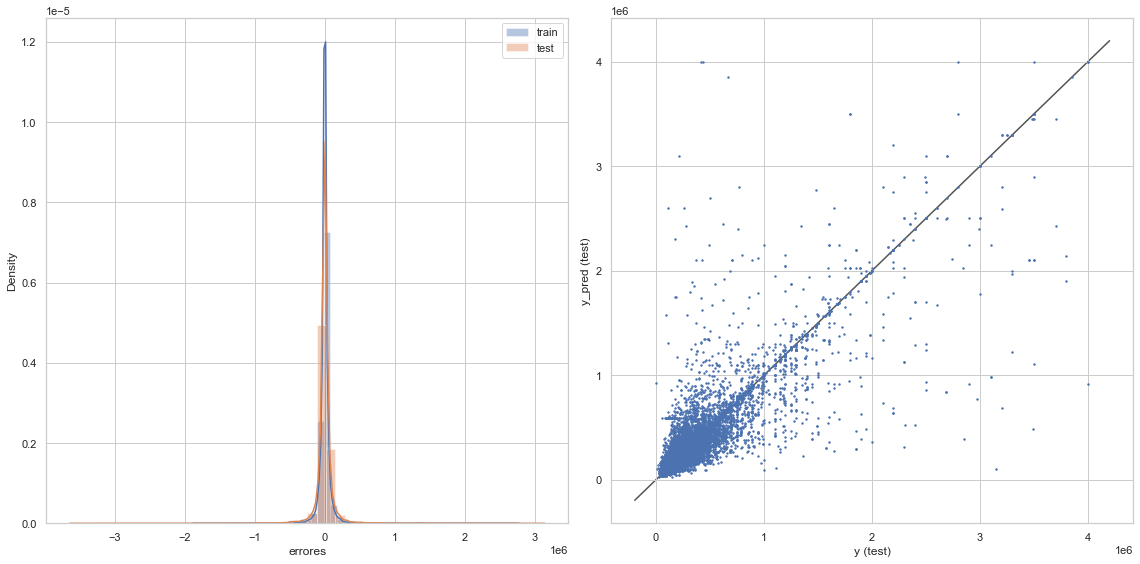

In [37]:
graficacion_errores(rmse_train_2,rmse_test_2,y_train_pred_2,y_test_pred_2)

# Árbol de decisiones:

In [38]:
#Ahora haremos algo similar a los vecinos, pero con la profundidad:
from sklearn.tree import DecisionTreeRegressor

deep = list(np.arange(1,51))
lista_rmse_train_clf = []
lista_rmse_test_clf = []

for i in deep:
    clf = DecisionTreeRegressor(max_depth=i, random_state=42)
    clf.fit(X_train,y_train)
    
    y_train_predclf = clf.predict(X_train)
    y_test_predclf = clf.predict(X_test)
    
    rmse_trainclf = np.sqrt(mean_squared_error(y_train, y_train_predclf))
    rmse_testclf = np.sqrt(mean_squared_error(y_test, y_test_predclf))
    
    lista_rmse_train_clf.append(rmse_trainclf)
    lista_rmse_test_clf.append(rmse_testclf)

Text(0, 0.5, 'RMSE')

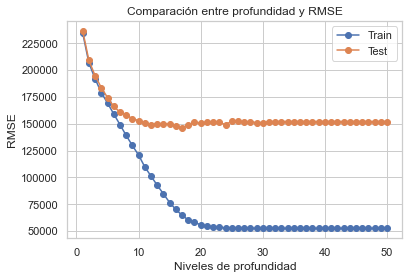

In [39]:
#Realizamos el test visual
plt.plot(deep, lista_rmse_train_clf, 'o-', label='Train')
plt.plot(deep, lista_rmse_test_clf, 'o-', label='Test')
plt.title('Comparación entre profundidad y RMSE')
plt.legend()
plt.xlabel('Niveles de profundidad')
plt.ylabel('RMSE')

Recordar que un número de vecinos excesivo genera Overfiting. Aparentemente con **10** niveles de profundidad tiene una baja RMSE
__________________________

In [40]:
#Volvemos a correr el modelo, esta vez con 10 niveles de profunidad
#Esta vez con dos vecinos, resultado del promedio entre 1 y 3 del train vs test respectivamente
clf_2 = DecisionTreeRegressor(max_depth=10,random_state=42)
clf_2.fit(X_train,y_train)
y_train_pred_clf = clf_2.predict(X_train)
y_test_pred_clf = clf_2.predict(X_test)
rmse_train_clf = np.sqrt(mean_squared_error(y_train, y_train_pred_clf))
rmse_test_clf = np.sqrt(mean_squared_error(y_test, y_test_pred_clf))

Raíz del error cuadrático medio en Train: 120797.5008434747
Raíz del error cuadrático medio en Test: 152950.67757423845


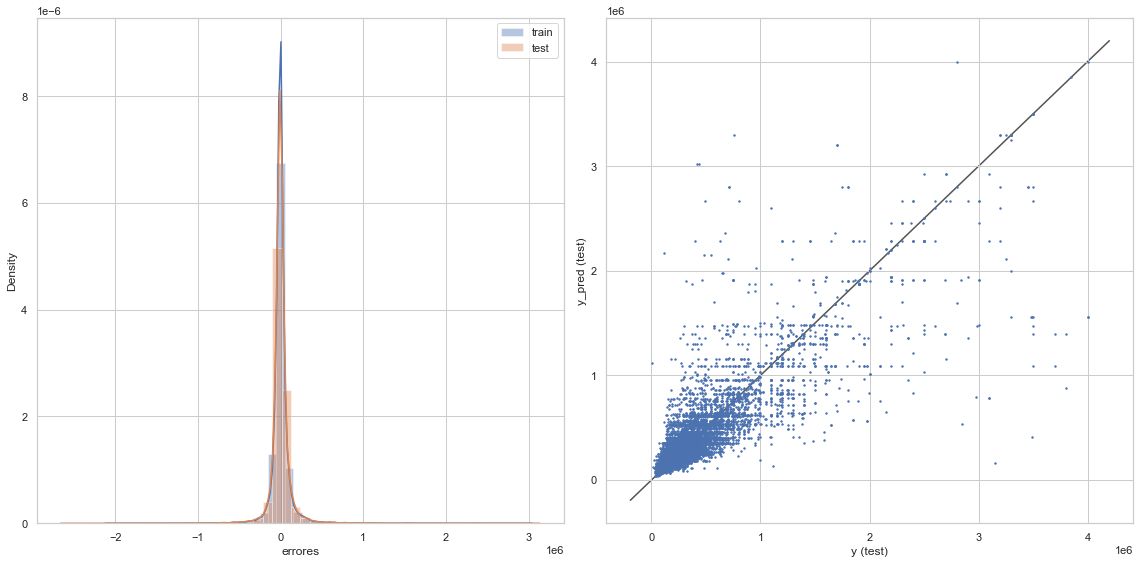

In [41]:
graficacion_errores(rmse_train_clf,rmse_test_clf,y_train_pred_clf,y_test_pred_clf)

8) Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

In [42]:
#Para responder a esa pregunta recordemos que tenemos RMSE para cada modelo en train y test:
resumen = {
    'Modelo': ['Lineal','KNN (2neig)', 'Tree Decision (10deep)'],
    'RMSE para Train':[rmse_train_lin,rmse_train_2,rmse_train_clf],
    'RMSE para test':[rmse_test_lin,rmse_test_2,rmse_test_clf],
    'Promedio entre ambos':[np.mean([rmse_train_lin,rmse_test_lin]),
                            np.mean([rmse_train_2,rmse_test_2]),
                            np.mean([rmse_train_clf,rmse_test_clf])] 
            }

resumen_df = pd.DataFrame(resumen)
resumen_df

Modelo  RMSE para Train  RMSE para test  \
0                  Lineal    199173.832535   202449.365404   
1             KNN (2neig)     92435.070246   153607.766986   
2  Tree Decision (10deep)    120797.500843   152950.677574   

   Promedio entre ambos  
0         200811.598969  
1         123021.418616  
2         136874.089209

La decisión aún no es clara, fíjese que para el test tanto KNN como CLF pueden estar en el mismo valor estadístico.

Según esto sería recomendable irse por Vecinos Cercanos.

9) Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Vamos a mirar la importancia de cada atributo en los árboles:

Text(0.5, 1.0, 'Importancia de cada atributo a la variable explicativa')

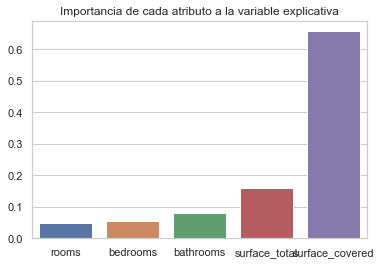

In [43]:
importancia = clf.feature_importances_
columnas = X.columns
sns.barplot(columnas,importancia)
plt.title('Importancia de cada atributo a la variable explicativa')

Teniendo en cuenta que la superficie cubierta tiene una ponderada ventaja sobre todos los demás, y que en este ejercicio no es posbile agregar variables categóricas, vamos a realizar nuevamente los modelos solamente entre precio y superficie cubierta:

In [44]:
X = ML_properati.surface_covered
X = np.array(X).reshape(-1,1)
y = ML_properati.price

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#Queda constituido los datos de entrenamiento y testeo:

#56713 obs para entrenar y 24306 para testear, y tenemos 5 variables que van a predecir X

(56713, 1) (56713,) (24306, 1) (24306,)


# MODELO LINEAL (Sencillo)

Raíz del error cuadrático medio en Train: 279497.0540674159
Raíz del error cuadrático medio en Test: 303193.2329218578


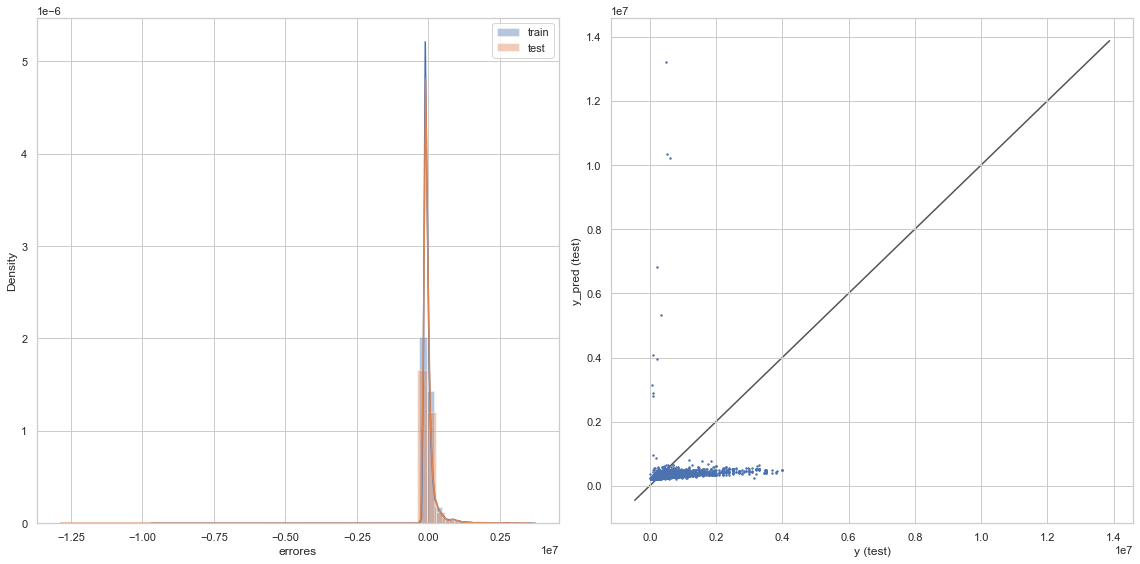

In [46]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_train_pred_lin = linear_model.predict(X_train)
y_test_pred_lin = linear_model.predict(X_test)
rmse_train_lin = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
rmse_test_lin = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))

graficacion_errores(rmse_train_lin,rmse_test_lin,y_train_pred_lin,y_test_pred_lin)

# KNN

In [47]:
#Evaluaremos que número de vecinos es el óptimo:

from sklearn.neighbors import KNeighborsRegressor

#Vamos a hacer este ejercicio usando "vecinos" 
#como el argumento que modificara la la cantidad de vecinos.
#Encontraremos visualmente cuál es el número de vecinos que mejor reduce el RMSE
vecinos = list(np.arange(1,26))
lista_rmse_train = []
lista_rmse_test = []

for i in vecinos:
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    
    y_train_pred = KNN.predict(X_train)
    y_test_pred = KNN.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)

Text(0, 0.5, 'RMSE')

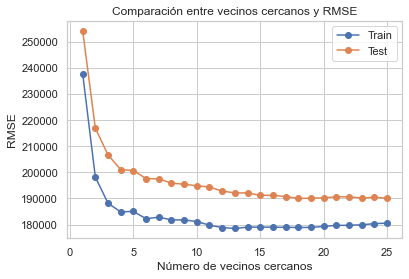

In [48]:
#Realizamos el test visual
plt.plot(vecinos, lista_rmse_train, 'o-', label='Train')
plt.plot(vecinos, lista_rmse_test, 'o-', label='Test')
plt.title('Comparación entre vecinos cercanos y RMSE')
plt.legend()
plt.xlabel('Número de vecinos cercanos')
plt.ylabel('RMSE')

In [49]:
#Acá sería prudente dejarlo entre 5 a 10, siendo 6 un buen candidadato. Volvamos a correrlo:

In [50]:
#Volvemos a correr el modelo
KNN_2 = KNeighborsRegressor(n_neighbors=6)
KNN_2.fit(X_train,y_train)
y_train_pred_2 = KNN_2.predict(X_train)
y_test_pred_2 = KNN_2.predict(X_test)
rmse_train_2 = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))

Raíz del error cuadrático medio en Train: 182235.5870976127
Raíz del error cuadrático medio en Test: 197625.2520250368


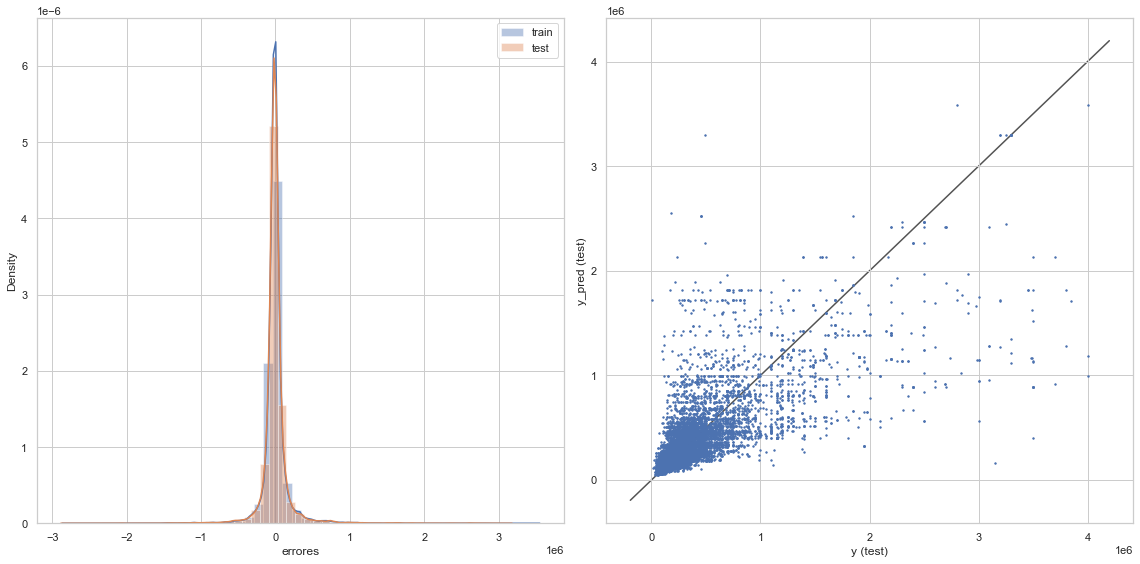

In [51]:
graficacion_errores(rmse_train_2,rmse_test_2,y_train_pred_2,y_test_pred_2)

# Árbol de decisiones:

In [52]:
deep = list(np.arange(1,51))
lista_rmse_train_clf = []
lista_rmse_test_clf = []

for i in deep:
    clf = DecisionTreeRegressor(max_depth=i, random_state=42)
    clf.fit(X_train,y_train)
    
    y_train_predclf = clf.predict(X_train)
    y_test_predclf = clf.predict(X_test)
    
    rmse_trainclf = np.sqrt(mean_squared_error(y_train, y_train_predclf))
    rmse_testclf = np.sqrt(mean_squared_error(y_test, y_test_predclf))
    
    lista_rmse_train_clf.append(rmse_trainclf)
    lista_rmse_test_clf.append(rmse_testclf)

Text(0, 0.5, 'RMSE')

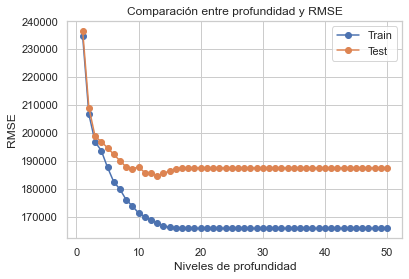

In [53]:
#Realizamos el test visual
plt.plot(deep, lista_rmse_train_clf, 'o-', label='Train')
plt.plot(deep, lista_rmse_test_clf, 'o-', label='Test')
plt.title('Comparación entre profundidad y RMSE')
plt.legend()
plt.xlabel('Niveles de profundidad')
plt.ylabel('RMSE')

Recordar que un número de vecinos excesivo genera Overfiting. Aparentemente entre **10** y **20** niveles de profundidad tiene una baja RMSE. Vámonos por el valor medio **15**
__________________________

In [54]:
#Volvemos a correr el modelo, esta vez con 10 niveles de profunidad
#Esta vez con dos vecinos, resultado del promedio entre 1 y 3 del train vs test respectivamente
clf_2 = DecisionTreeRegressor(max_depth=15,random_state=42)
clf_2.fit(X_train,y_train)
y_train_pred_clf = clf_2.predict(X_train)
y_test_pred_clf = clf_2.predict(X_test)
rmse_train_clf = np.sqrt(mean_squared_error(y_train, y_train_pred_clf))
rmse_test_clf = np.sqrt(mean_squared_error(y_test, y_test_pred_clf))

Raíz del error cuadrático medio en Train: 166119.98708445986
Raíz del error cuadrático medio en Test: 186366.98586793063


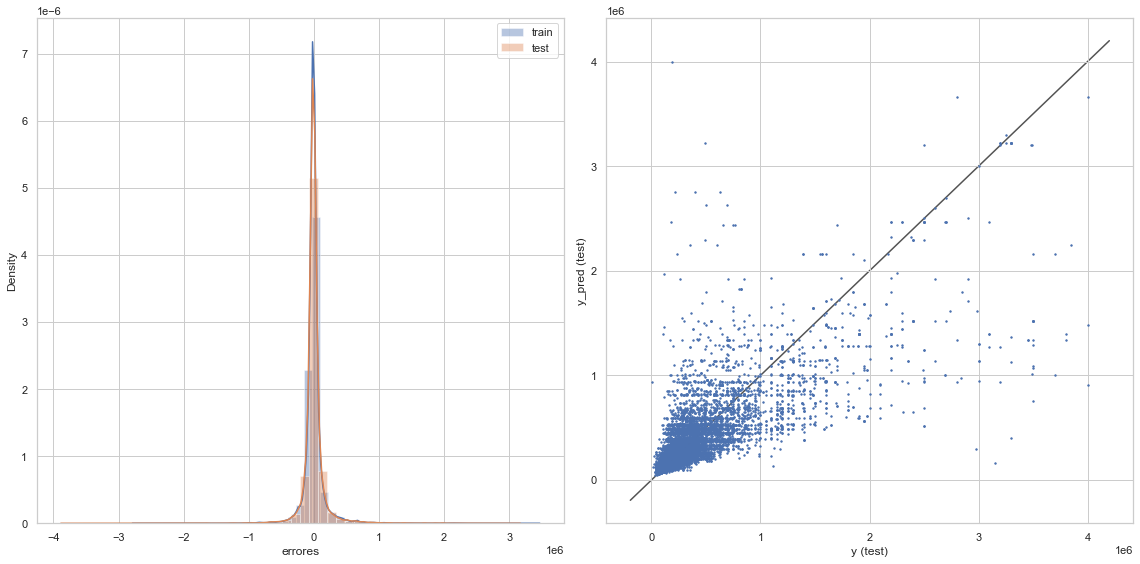

In [55]:
graficacion_errores(rmse_train_clf,rmse_test_clf,y_train_pred_clf,y_test_pred_clf)

8) Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué?

In [56]:
#Para responder a esa pregunta recordemos que tenemos RMSE para cada modelo en train y test:
resumen2 = {
    'Modelos XvsY': ['Lineal','KNN (6neig)', 'Tree Decision (15deep)'],
    'RMSE para Train':[rmse_train_lin,rmse_train_2,rmse_train_clf],
    'RMSE para test':[rmse_test_lin,rmse_test_2,rmse_test_clf],
    'Promedio entre ambos':[np.mean([rmse_train_lin,rmse_test_lin]),
                            np.mean([rmse_train_2,rmse_test_2]),
                            np.mean([rmse_train_clf,rmse_test_clf])] 
            }

resumen_df2 = pd.DataFrame(resumen2)

In [57]:
resumen_df

Modelo  RMSE para Train  RMSE para test  \
0                  Lineal    199173.832535   202449.365404   
1             KNN (2neig)     92435.070246   153607.766986   
2  Tree Decision (10deep)    120797.500843   152950.677574   

   Promedio entre ambos  
0         200811.598969  
1         123021.418616  
2         136874.089209

In [58]:
resumen_df2

Modelos XvsY  RMSE para Train  RMSE para test  \
0                  Lineal    279497.054067   303193.232922   
1             KNN (6neig)    182235.587098   197625.252025   
2  Tree Decision (15deep)    166119.987084   186366.985868   

   Promedio entre ambos  
0         291345.143495  
1         189930.419561  
2         176243.486476

Acá finalmente vemos la comparación de los modelos.
Podrías seguir haciéndolos para encontrar qué variables meter y en cuáles los errores son menores. También valdría la pena correr varias veces el train test de forma aleatoria, de manera que vaya generando un modelo que abarque de la experiencia.

Se puede ver una mejora en la predicción de precios. Es cuestión de comparar ambas tablas. Evidentemente reducir a una variable mejoró el resultado. Esta vez siendo competitivo los vecinos y el árbol. Por parsimonia sería mejor quedarse con 6 vecinos y no con 15 niveles de profundidad.

Por ahora el trabajo básico ha sido realizado.

# ¡¡MUCHAS GRACIAS!!